This is based on : https://github.com/shantnu/FaceDetect

In [1]:
import sys
#workaround for openCV on osX
sys.path.append('/usr/local/lib/python3.6/site-packages') 

# IMPORTANT: OPENCV 3 for Python 3 is needed, install it from : 
# http://docs.opencv.org/3.0-beta/doc/tutorials/introduction/windows_install/windows_install.html
# or on MAC : brew install opencv3 --with-contrib --with-python3 --HEAD
# http://www.pyimagesearch.com/2016/12/19/install-opencv-3-on-macos-with-homebrew-the-easy-way/

import cv2
import matplotlib.pyplot as plt
import PIL 
import numpy as np

#workaround for plots inside the noptebook
%matplotlib inline
plt.rcParams['figure.figsize'] = (5.0, 5.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

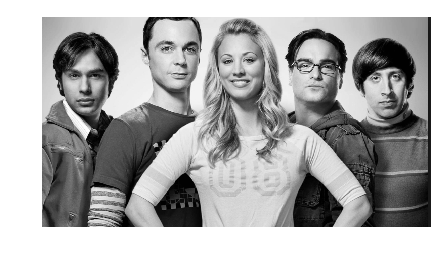

In [2]:
# Get user supplied image
imagePath = 'big_bang.png'
# the code to use a camera is below (so simple in python !)
# for camera, use
# video_capture = cv2.VideoCapture(0)
#ret, frame = video_capture.read()

# The face recognition properties, recognizing only frontal face
cascPath = 'haarcascade_frontalface_default.xml'

# Create the haar cascade
faceCascade = cv2.CascadeClassifier(cascPath)

#read image and convert to grayscale
image = cv2.imread(imagePath,1)
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
plt.imshow(gray)
plt.axis('off');

Found 5 faces in  big_bang.png  !


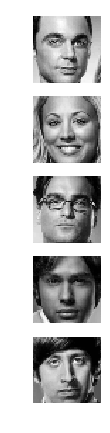

In [4]:
# Detect faces in the image
faces = faceCascade.detectMultiScale(
    gray,
    scaleFactor=1.1,
    minNeighbors=5,
    minSize=(30, 30)
)

print("Found {0} faces in ".format(len(faces)), imagePath, " !")

#preparing an array to store each face img separately 
faces_imgs = np.zeros((len(faces),48,48))

# iterate through the faces and save them into a separate array
num_fac = 0;

for (x, y, w, h) in faces:
    face_single = image[y:y+h,x:x+w];
    #resize to 48x48
    face_resized = cv2.resize(face_single, (48,48));
    #cv2.imwrite('Face'+str(num_fac)+'.png', face_resized)
    #taking only one color (because it's grey RGB)
    faces_imgs[num_fac] = face_resized[:,:,0]
    num_fac = num_fac+1;
    #adding rectangles to faces

# adding rectangles on faces in the image
for (x, y, w, h) in faces:
    cv2.rectangle(image, (x, y), (x+w, y+h), (0, 255, 0), 1)
#cv2.imshow("Faces found", image)
cv2.imwrite('Faces_recognized.png', image)

#plotting separate faces
for i in range(0,len(faces)):
    plt.subplot( len(faces),1,i+1)
    plt.imshow(faces_imgs[i,:,:])
    plt.axis('off')

plt.show()
        

